<center>
    <h1 style="color:red;">Apprentissage Automatique Numérique</h1>
    <h2> TP sur Bayes Naif </h2>
    <p> Auteur: Killian MARCHAND </p>
</center>


<h3 style="color:green;"> Importation de librairies</h3>

In [2]:
from sklearn import datasets
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

<h2 style="color:blue;"> Division de l’´echantillon d’apprentissage </h2>

<p>
Les données ont été mélanger pour assurer une comparaison correcte entre les différents classifieur nous divisons les données en trois
parties : apprentissages, dev et test :<br>
— Apprentissage : 100 premiers exemples<br>
— Dev : 30 exemples suivants<br>
— Test : 20 derniers exemples.<br>
 </p>

In [3]:
iris = datasets.load_iris()
Ciris = np.c_[iris.data.reshape(len(iris.data), -1), iris.target.reshape(len(iris.target), -1)]

np.random.seed(987654321)
np.random.shuffle(Ciris)

shuffledIrisData = Ciris[ :, :iris.data.size//len(iris.data)].reshape(iris.data.shape)
shuffledIrisTarget = Ciris[ :, iris.data.size//len(iris.data) :].reshape(iris.target.shape)

<span style="color:#3F70A3; font-family:Georgia; font-size:1.3em;">I. Séparation des classes </span>

In [4]:
#Données d'entrainement
trainData = shuffledIrisData[:100]
trainTarget = shuffledIrisTarget[:100]


#Données de developpement
devData = shuffledIrisData[100:130]
devTarget = shuffledIrisTarget[100:130]


#Données de test
testData = shuffledIrisData[130:150]
testTarget = shuffledIrisTarget[130:150]

<h2 style="color:blue;"> Phase d'apprentissage </h2>

<p>Il faut estimer deux types de probabilités : <br>
— Les probabilités `a priori p(ωi) pour i = {0, 1, 2}.<br>
— Les vraisemblances (probabilités conditionnelles) P(x|ωi). On suppose que celles-ci suivent une loi
Gaussienne de dimension 2. Il s’agit donc d’obtenir la moyenne µi (vecteur de dimension 2) et la
matrice de variance-covariance Σi (matrice de dimension 2 × 2), séparément pour chaque classe
ωi
. </p>

<span style="color:#3F70A3; font-family:Georgia; font-size:1.3em;">I. Estimation des probabilté à priori des 3 classes </span>

In [5]:
# pw1 = ((trainTarget == 0).sum())/len(trainTarget) #Proba de la classe 0
# pw2 = ((trainTarget == 1).sum())/len(trainTarget) #Proba de la classe 1
# pw3 = ((trainTarget == 2).sum())/len(trainTarget) #Proba de la classe 2
aPrio = np.zeros((3,))

for i in range(3):
    aPrio[i] = ((trainTarget == i).sum())/len(trainTarget)  

print("Probabilité des classes\n", aPrio)

Probabilité des classes
 [0.32 0.37 0.31]


<span style="color:#3F70A3; font-family:Georgia; font-size:1.3em;">II. Estimation des moyennes des features en fonction des classes  </span>

In [6]:
moyFeatureClass = np.ndarray((3,4)) #Matrice conteanant les moyennes de chaques classes en fonction des features

for cls in range(3):
    for feat in range(4):
        moyFeatureClass[cls][feat] = trainData[trainTarget == cls][:,feat].mean()

print("Moyennes des features en fontion de chaques classes\n", moyFeatureClass)

Moyennes des features en fontion de chaques classes
 [[4.971875   3.40625    1.459375   0.23125   ]
 [5.82972973 2.75405405 4.16756757 1.28918919]
 [6.54516129 3.01612903 5.51290323 2.02903226]]


<span style="color:#3F70A3; font-family:Georgia; font-size:1.3em;">III. Calcul des covariances  </span>

In [7]:
cov_features_class = {}

for i in range(3):
    cov_features_class[i] = np.cov(np.transpose(trainData[(trainTarget == i)]), ddof=0)

print("Matrice de covariance\n\n", cov_features_class)

Matrice de covariance

 {0: array([[0.10264648, 0.07580078, 0.01166992, 0.00494141],
       [0.07580078, 0.11808594, 0.01212891, 0.00105469],
       [0.01166992, 0.01212891, 0.03741211, 0.00658203],
       [0.00494141, 0.00105469, 0.00658203, 0.00902344]]), 1: array([[0.23776479, 0.09271731, 0.16420745, 0.0503214 ],
       [0.09271731, 0.09869978, 0.08878013, 0.04463842],
       [0.16420745, 0.08878013, 0.19786706, 0.05883857],
       [0.0503214 , 0.04463842, 0.05883857, 0.0328561 ]]), 2: array([[0.27667014, 0.08540062, 0.20877211, 0.02578564],
       [0.08540062, 0.08780437, 0.07559834, 0.04662851],
       [0.20877211, 0.07559834, 0.25080125, 0.02704475],
       [0.02578564, 0.04662851, 0.02704475, 0.07044745]])}


<span style="color:#3F70A3; font-family:Georgia; font-size:1.3em;">IV. Application de la densité de probabilité  </span>

In [8]:
dimension = 4
l = [0,1,2,3]
fc= feature_combinaison = list(it.combinations(l,dimension))

def calc_pxiwi(dim,x):
    sigma = np.ndarray((dim, dim))
    xd = np.ndarray((dim,))
    mu= np.ndarray((dim,))
    
    res= [{},{},{}]
    
    for i in range(3):
        for j in range(len(fc)):
            for k in range(dim):
                mu[k] = moyFeatureClass[i][fc[j][k]]
                xd[k] = x[fc[j][k]]
                for k2 in range(dim):
                    sigma[k][k2] = cov_features_class[i][fc[j][k]][fc[j][k2]]
            res[i][fc[j]]= ( 1 / ((2*np.pi) ** (dim/2)) * (np.linalg.det(sigma)**(1/2))) * np.exp((-1/2) * np.transpose(xd-mu).dot(np.linalg.inv(sigma)).dot(xd-mu))
                    
    return res

<h2 style="color:blue;">Phase de Developpement</h2>

<p>
On traite séquentiellement tous les exemples du corpus de développement. Pour chaque exemple on
calcule la probabilité a posteriori P(ωi|x) = P(x|ωi)p(ωi) avec les paramètres déterminés lors de la
phase d’apprentissage, et ceci pour toutes les 3 classes i = 0..9. La classe pour laquelle la probabilité
a posteriori est maximum est la classe reconnue. Puisque vous connaissez la bonne classe pour chaque
exemple du corpus de développement, vous pouvez compter le nombre d’erreurs.
</p>

In [9]:
#Calcul des pxiwi pour chaque tuple de feature

postprio = np.ndarray((len(devData),3,len(fc)))

for i in range(len(devData)):
    pxiwi = calc_pxiwi(dimension, devData[i])
    
    for tuple in range (len(fc)):
        for j in range(3):
            postprio[i][j][tuple] = pxiwi[j][fc[tuple]]*aPrio[j]


In [10]:
bayes = np.argmax(postprio, axis=1)
err = np.zeros(len(fc))

for i in range(len(fc)):
    for j in range(len(devData)):
        print("Estimation: ", bayes[:,i][j], "Target: ", devTarget[j])
        if bayes[:,i][j] != devTarget[j]:
            err[i] += 1
    print("Features: ", fc[i], "Erreur: ", err[i], "\n\n")
    


Estimation:  2 Target:  2.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  0 Target:  0.0
Estimation:  1 Target:  1.0
Estimation:  2 Target:  1.0
Estimation:  0 Target:  0.0
Estimation:  0 Target:  0.0
Estimation:  2 Target:  1.0
Estimation:  2 Target:  2.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  2 Target:  1.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  0 Target:  0.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  1 Target:  1.0
Estimation:  1 Target:  1.0
Estimation:  0 Target:  0.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  0 Target:  0.0
Estimation:  1 Target:  1.0
Estimation:  2 Target:  2.0
Estimation:  2 Target:  2.0
Estimation:  0 Target:  0.0
Estimation:  2 Target:  2.0
Estimation:  2 Target:  2.0
Features:  (0, 1, 2, 3) Erreur:  3.0 




In [11]:
print("Meilleur tuple: ", fc[np.argmin(err)])

Meilleur tuple:  (0, 1, 2, 3)


<h2 style="color:blue;">Phase d'Evaluation</h2>

<p>
Vous utiliserez votre meilleur système pour classer tous les exemples du corpus de Test de la même
manière que ci-dessus. Les résultats calculés sur le corpus de Test ne doivent pas être utilisés pour
déterminer votre meilleur système.
</p>

In [16]:
postpriori = np.ndarray((len(testData),3,len(fc)))
for i in range(len(testData)):
    pxiwi = calc_pxiwi(dimension, testData[i])
    for j in range(3):
        postpriori[i][j] = pxiwi[j][fc[np.argmin(err)]]*aPrio[j]

bayes = np.argmax(postpriori, axis=1)

err1 = 0
for i in range(len(testData)):
    print("Estimation: ", bayes[:,fc.index(fc[np.argmin(err)])][i], "Target: ", devTarget[i])
    if bayes[:,fc.index(fc[np.argmin(err)])][i] != devTarget[i]:
        err1 +=1
print("Erreur: ", err1)

Estimation:  2 Target:  2.0
Estimation:  2 Target:  2.0
Estimation:  1 Target:  0.0
Estimation:  2 Target:  0.0
Estimation:  0 Target:  1.0
Estimation:  2 Target:  1.0
Estimation:  1 Target:  0.0
Estimation:  2 Target:  0.0
Estimation:  0 Target:  1.0
Estimation:  2 Target:  2.0
Estimation:  1 Target:  2.0
Estimation:  2 Target:  0.0
Estimation:  0 Target:  1.0
Estimation:  0 Target:  2.0
Estimation:  1 Target:  0.0
Estimation:  0 Target:  0.0
Estimation:  1 Target:  2.0
Estimation:  2 Target:  0.0
Estimation:  2 Target:  1.0
Estimation:  0 Target:  1.0
Erreur:  16


<h2 style="color:blue;">Courbe sur les données d'entrainement</h2>

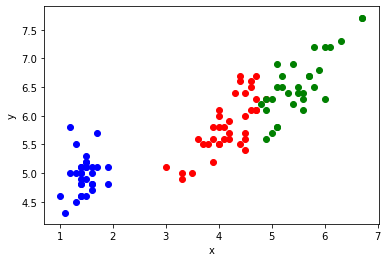

In [17]:
x = trainData[:,2]
y = trainData[:,0]

plt.scatter(x[(trainTarget == 0)],y[(trainTarget == 0)], c="blue")
plt.scatter(x[(trainTarget == 1)],y[(trainTarget == 1)], c="red")
plt.scatter(x[(trainTarget == 2)],y[(trainTarget == 2)], c="green")

plt.title("")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

<h2 style="color:blue;">Courbe sur les données d'évaluations</h2>

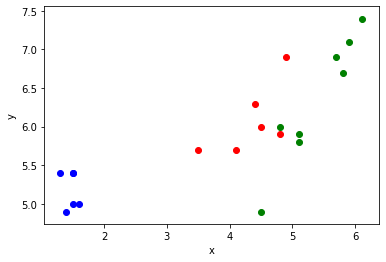

In [18]:
x = testData[:,2]
y = testData[:,0]

plt.scatter(x[(testTarget == 0)],y[(testTarget == 0)], c="blue")
plt.scatter(x[(testTarget == 1)],y[(testTarget == 1)], c="red")
plt.scatter(x[(testTarget == 2)],y[(testTarget == 2)], c="green")

plt.title("")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

<p>
    A partir des deux courbes affichées juste au dessus, nous pouvons remarquer et déterminer les frontières de décision entre les différentes classes.
</p>

<h2 style="color:blue;">Matrice de confusion</h2>

In [21]:
c_matrix = confusion_matrix(testTarget, bayes[:,fc.index(fc[np.argmin(err)])], labels = [0,1,2])
print(c_matrix)

[[6 0 0]
 [0 5 1]
 [0 0 8]]
